In [1]:
import tensorflow as tf 
tf.test.gpu_device_name()

''

# **EDA and Machine Learning prediction on Spam/Ham Messages**

## **1. Problem Statement**

The dataset contains a set of SMS tagged messages which is used for predicting messages that have been Spam.

This dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam

## **2. Importing Packages**

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
%config InlineBackend.figure_format = 'retina'

In [85]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [0]:

import nltk #natural language toolkit
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer #vectorization
from sklearn.feature_extraction.text import TfidfTransformer # to convert vectorize value into weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **3. Loading Data**

In [11]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/spam.csv', encoding='latin-1')
csv_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN


**Description of the Dataset**

This dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

*   v1- column with two categories spam and ham. To tell the messages if they are spam or ham category.
*   v2- column contains the messages list
*   Remaining three are unnamed columns with no necessary values later will drop them.





## **4. Data Preprocessing**



*   Now drop "unnamed" columns and rename v1 and v2 to "label" and 
"message"

In [0]:
csv_df = csv_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
csv_df = csv_df.rename(columns = {'v1':'Label','v2':'Message'})

In [13]:
csv_df.head()


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"




*   check if any columns have null values.




In [13]:
csv_df.isnull().sum()

Label      0
Message    0
dtype: int64

In [14]:

csv_df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30




*   Now let's assign labels spam as 1 and ham as 0 easy understanding.




In [15]:
csv_df['Label'] = csv_df['Label'].map({'ham': 0, 'spam': 1})
csv_df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"




*   Now let's create new feature "message length" and plot it to see if it's of any interest



In [18]:
csv_df['length'] = csv_df['Message'].apply(len)
csv_df.head()

,Label,Message,length
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives around here though",61


In [19]:
csv_df['length'].max()

910

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f429ea7aeb8>,
      dtype=object)

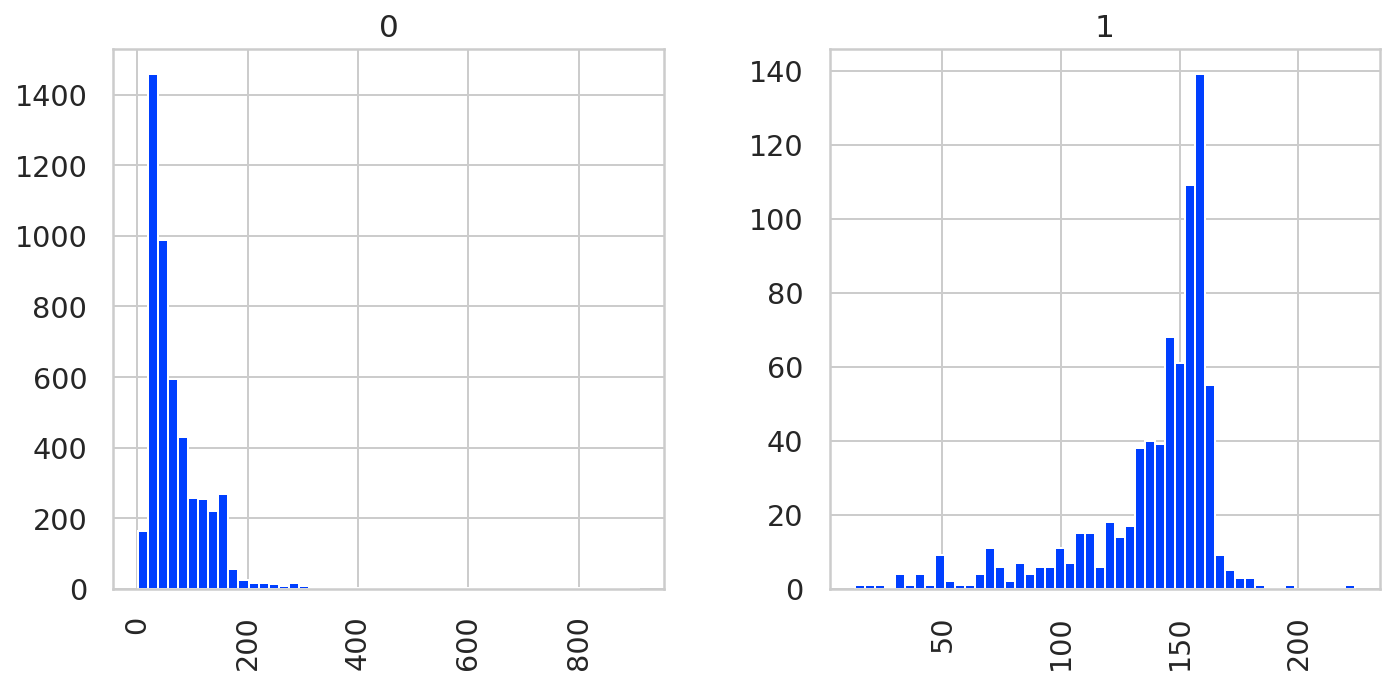

In [30]:
plt.style.use('seaborn-bright')
csv_df.hist(column='length', by='Label', bins=50,figsize=(11,5))





*   From the above plot we can see that lengthy is the message, more likely it is a spam.







*   Generate a word cloud image






*   Word Cloud image for spam 




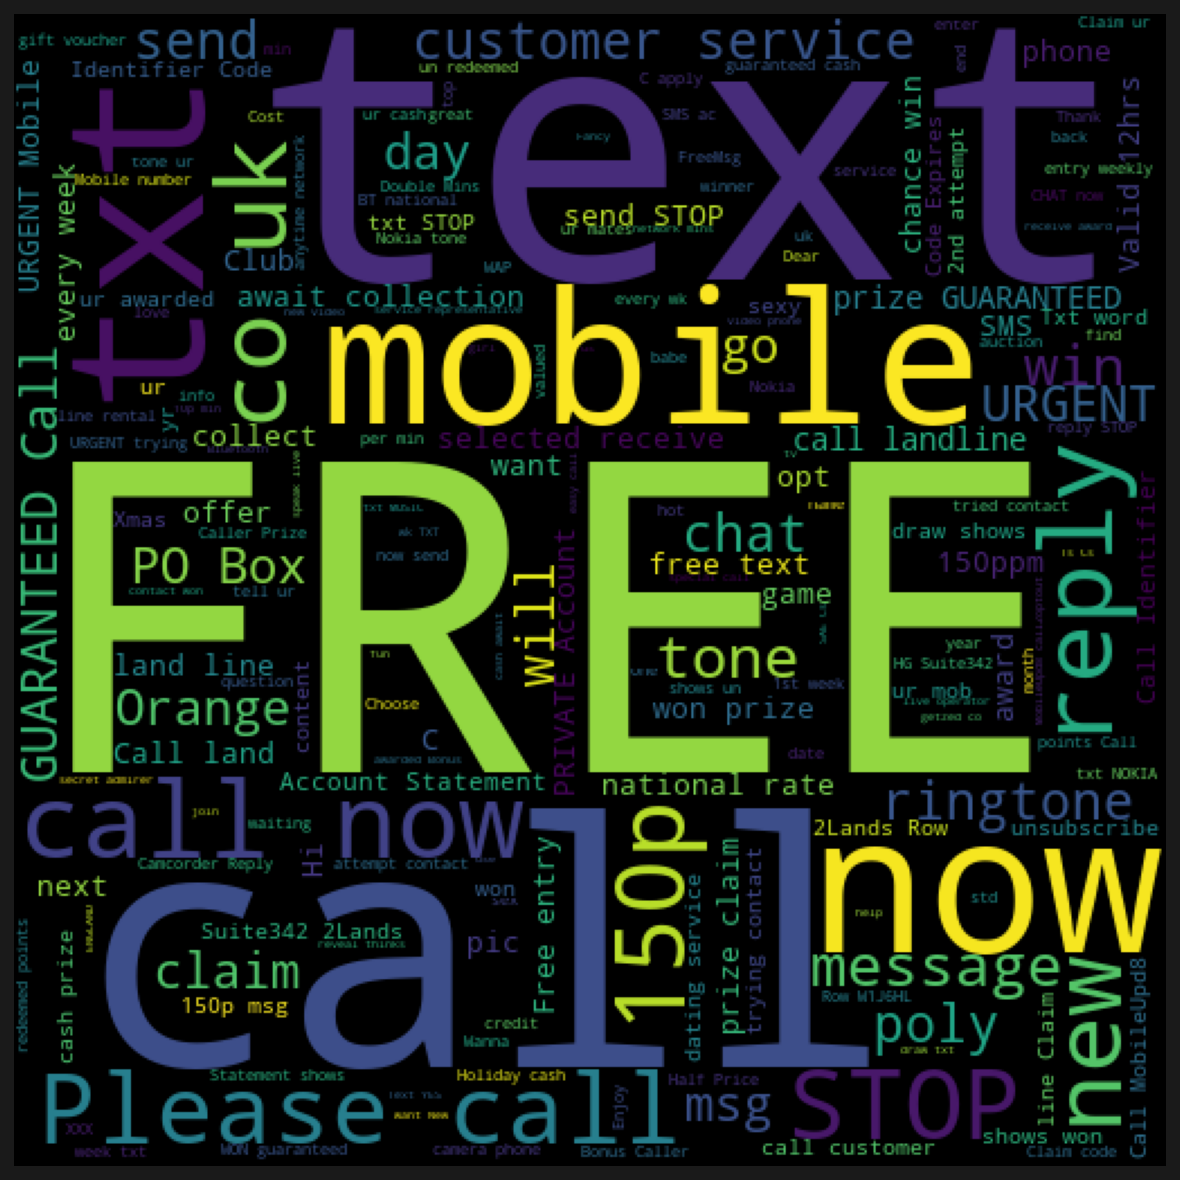

In [33]:

from wordcloud import WordCloud
spam_words = ' '.join(list(csv_df[csv_df['Label'] == 1]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

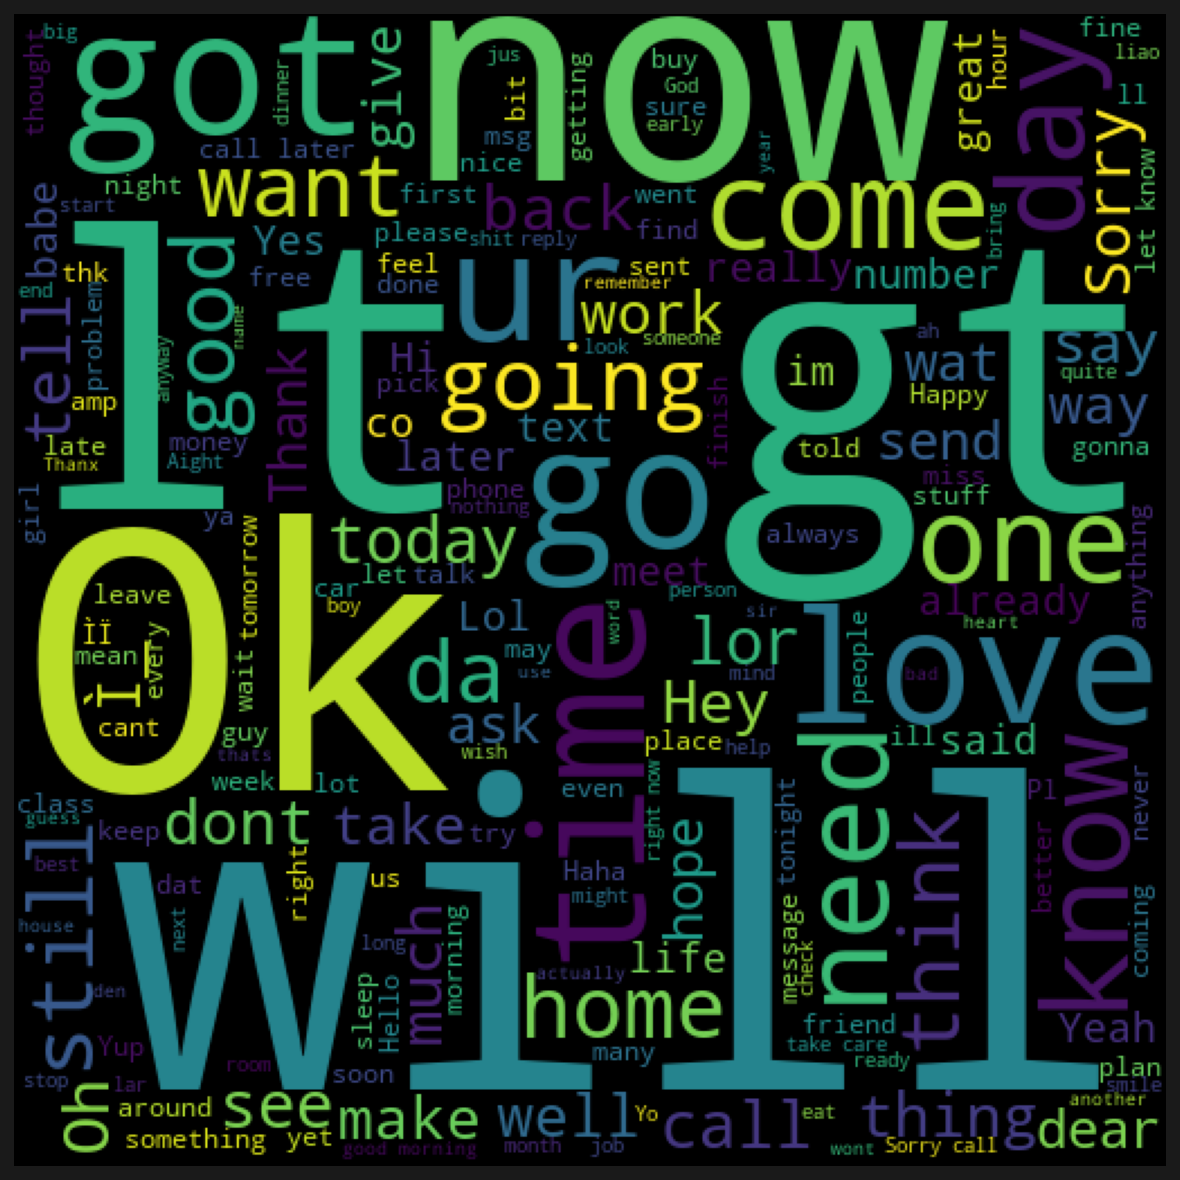

In [34]:
ham_words = ' '.join(list(csv_df[csv_df['Label'] == 0]['Message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**Train-Test split**

In [0]:
X_train,X_test,y_train,y_test = train_test_split(csv_df["Message"],csv_df["Label"], test_size = 0.2, random_state = 10)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457,)
(1115,)
(4457,)
(1115,)


## **5. Text Processing**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vect = CountVectorizer()

In [20]:
type(vect)

sklearn.feature_extraction.text.CountVectorizer

In [21]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [0]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [0]:
X_train_df = vect.transform(X_train)

In [0]:
X_test_df = vect.transform(X_test)

In [0]:
ham_words = ''
spam_words = ''
spam = csv_df[csv_df.Label == 1]
ham = csv_df[csv_df.Label == 0]

# **6.ML Models**

In [0]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **1. Naive bayes model**

In [29]:

from sklearn.naive_bayes import MultinomialNB
prediction = dict()
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
prediction["Multinomial"] = model.predict(X_test_df)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction["Multinomial"])

0.9883408071748879

## **2. Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction["Logistic"] = model.predict(X_test_df)

In [34]:
accuracy_score(y_test,prediction["Logistic"])

0.97847533632287

## **3. KNN classifier**

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
prediction["knn"] = model.predict(X_test_df)

In [37]:
accuracy_score(y_test,prediction["knn"])

0.9121076233183857

## **4. Random Forest classifier**

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
prediction["random_forest"] = model.predict(X_test_df)

In [40]:
accuracy_score(y_test,prediction["random_forest"])

0.9713004484304932



*   From the above models we generated we can say that we got the better accuracy for Naive Bayes analysis as compared to other models.








# **7. Model Evaluation**

**Confusion Matrix**

In [80]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [0]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5, 8.5, 'Predicted label')

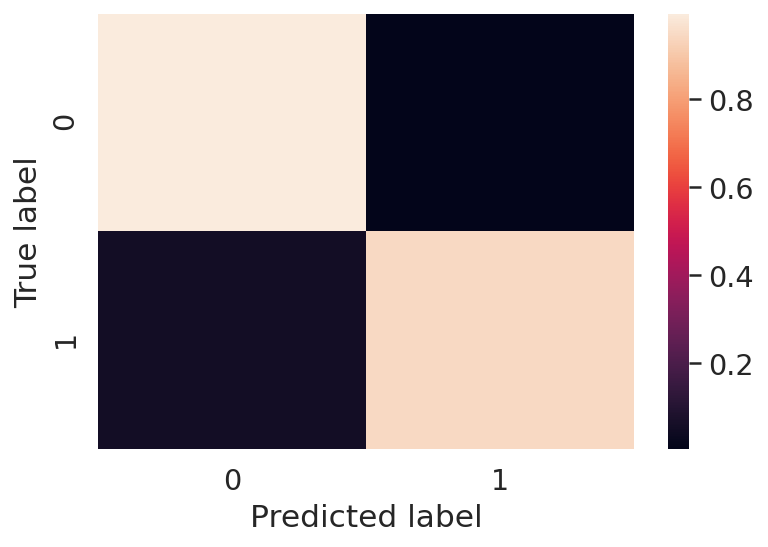

In [87]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [88]:
print(conf_mat)

[[960   5]
 [  8 142]]




*   By seeing the above confusion matrix, it is clear that 5 Ham are mis-classified as Spam, and 8 Spam are misclassified as Ham. Let'see what are those misclassified text messages.



In [0]:
pd.set_option('display.max_colwidth', -1)

In [90]:
# Misclassified as Spam
X_test[y_test < prediction["Multinomial"]]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: Message, dtype: object

In [91]:
# Misclassfied as Ham
X_test[y_test > prediction["Multinomial"] ]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo

# **8. Summary**



We performed EDA to undertand the relationship between both columns.

We have seen how the length of text is differentiated between spam and ham.

We constructed different machine learning models like Naive Bayes, KNN, linear regression model, decision tree model, random forest model and got best result with Naive Bayes model.

We performed advanced feature engineering to know the spam classified as ham and ham classified as spam.
